In [1]:
# This is a cell to hide all Code cells that has the string "hide_this_cell" from displaying
# This code must be inserted into the first cell to work properly

from IPython.display import HTML, display, Image

hide_this_cell = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_this_cell') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input style="opacity:0.2" type="submit" value="Show/hide the code running under the hood">
</form>''')

In [2]:
hide_this_cell

# PLEASE BE AWARE:
# If you can see this block of code, please do the following:
#
# 1. Press the "not trusted" square in the top right corner, consequently the notebook will refresh
#
# 2. Press "Kernel"
# 2.1 Press "Restart & Run All"

# The whole purpose of this block-cell is purely to autorun all the cells on notebook-load.
HTML('''
<script>
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>''');

In [3]:
# This cell is used for importing essential libraries that is not used to understand Qiskit and is therefore hidden
hide_this_cell

from IPython.display import clear_output, Markdown, HTML
from IPython.core.display import SVG, HTML, Image
from ipywidgets import widgets

# 1. Everything you need to know about Deutsch's algorithm
## 1.1 Intro
During the beginning of the 20th century, Alan Turing created the foundation to so much of computer science, making it hard to do anything with computers that isn't some way influenced by his work. The same applies to David Deutsch, who in 1985 considered computing devices based upon the principles of quantum mechanics, which ultimately led us to the modern conception of a quantum computer[QC-6].

This remarkable first step taken by Deutsch was improved in the subsequent decade by many people, culminating in a list of quantum algorithms, where the majority of these may provide exponential speedup over their classical counterparts and the others, like Grover's algorithm, _may only_ provide a quadratic speedup[QC-38].

It is a fun fact to know - but knowing is not as awesome as trying it yourself, hence why we will go forth with diving into the first _problem_ Deutsch created an algorithm for, which the quantum computer can solve faster than a traditional computer, although not exponentially faster.

The problem that Deutsch's algorithm solves is not an important problem in Computer Science. However, it is a great beginners problem to see how quantum computers can be used and it is presented here with that purpose. _If you are familiar with programming, you can see this as your “hello world” ;-)._

---
## 1.2. Classical prerequisite knowledge _(Gives you a deeper understanding)_
### Bits and operations
Given you have a *single bit*, the traditional logic considers this bit either of two values: True $(1)$ or False $(0)$.<br>

There are four different bitwise operations which can be used to manipulate this bit. For an example, _negation_ is one of the four operations, which is an operation on one logical value that switches the value to the opposite value e.g. from False $(0)$ to True $(1)$. 

All four of the operationens and the way they operate on a logical value can be seen on the picture below: 

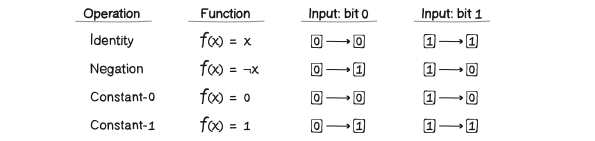

In [4]:
hide_this_cell
SVG(filename='../images/deutsch/ClassicInput.svg')

### Two types of functions
Another piece of information to understand is that the the functions for the abovementioned operations are either _balanced_ or _constant_.<br>
A _balanced_ function is if its output is 0 half the time and 1 the other half (Identity and Negation).<br>
A _constant_ function is if its output is a constant (1 or 0) regardless of the input (Constant-0 and Constant-1). 

### Reversible Computing
And the last piece of information to wrap your head around is a principle of reversible computing. <br>
It basically means that if I tell you which operation I use and the output of that operation, you will always be able to tell the input of that operation.<br> 
There is a lot more to it, but the most important principle to understand is that reversible operations can be reversed, or undone.<br><br>

<strong style="color: orange;">Question 1:</strong> Now, take a moment to think: which of the four operations seen on the picture above are reversible and which are not reversible?

In [5]:
hide_this_cell

tooltiptext = "The button will disappear when pressed and consequently reveals the answer"
buttonDisappear1 = widgets.Button(description='Reveal the answer', tooltip=tooltiptext, disabled=False)

def handleClickDisappear1(b):
    clear_output()
    display(Markdown('''Operations which permute **are** reversible:<br>
                         <span>&#8627;</span>  Identity and negation are therefore reversible.<br><br>
                        Operations which erase and overwrite **are not** reversible:<br>
                         <span>&#8627;</span>   Constant-0 and Constant-1 are therefore not reversible.<br>
                        <div class="alert alert-block alert-warning">
                        <b>Important info:</b> Quantum Computers only use reversible operations - as all quantum operators are their own inverses.<br>
                        Therefore, if you apply the same quantum operation twice, it will have the same state as it had initially. <br>
                        </div>'''))

buttonDisappear1.on_click(handleClickDisappear1)

display(buttonDisappear1)

Operations which permute **are** reversible:<br>
                         <span>&#8627;</span>  Identity and negation are therefore reversible.<br><br>
                        Operations which erase and overwrite **are not** reversible:<br>
                         <span>&#8627;</span>   Constant-0 and Constant-1 are therefore not reversible.<br>
                        <div class="alert alert-block alert-warning">
                        <b>Important info:</b> Quantum Computers only use reversible operations - as all quantum operators are their own inverses.<br>
                        Therefore, if you apply the same quantum operation twice, it will have the same state as it had initially. <br>
                        </div>

---
## 1.3. The Oracle 
The old greeks say that an Oracle is an object containing mysterious answers to life's question, which in this context is simply an answer to which function it is hiding. Hence we can't see what is inside the Oracle, it can and will be regarded as a "black box".

Now, imagine someone gives this "black box" to you as seen below and all you can do is supply it with inputs $|x>$ and receive outputs $f(|x>)$.

In [6]:
hide_this_cell
SVG(filename='../images/deutsch/ClassicBlackBox.svg')

<strong style="color: orange;">Question 2:</strong> Based on the four functions mentioned on the first picture - How many different input will you have to send through the black box to determine the function inside the black box on a **classical** computer?

In [7]:
hide_this_cell

tooltiptext = "The button will disappear when pressed and consequently reveals the answer"
buttonDisappear2 = widgets.Button(description='Reveal the answer', tooltip=tooltiptext, disabled=False)

def handleClickDisappear2(b):
    clear_output()
    display(Markdown('**Answer: Two** - By sending in a one and a zero, their output uniquely identifies which function it is'))
    
buttonDisappear2.on_click(handleClickDisappear2)

display(buttonDisappear2)

**Answer: Two** - By sending in a one and a zero, their output uniquely identifies which function it is

<strong style="color: orange;">Question 3:</strong> Based on your intuition and your collected knowledge about quantum computers - How many different input will you have to send through the black box to determine the function inside the black box on a **quantum** computer?

In [8]:
hide_this_cell

tooltiptext = "The button will disappear when pressed and consequently reveals the answer"
buttonDisappear3 = widgets.Button(description='Reveal the answer', tooltip=tooltiptext, disabled=False)

def handleClickDisappear3(b):
    clear_output()
    display(Markdown('**_Trick question_ - Answer: Two** - When the Qubit has been sent through the Black Box, it still collapses to a single bit of information, so to uniquely identify which function that has been used on the qubit, we still need to send through two different inputs (1 and 0)'))
    
buttonDisappear3.on_click(handleClickDisappear3)

display(buttonDisappear3)

**_Trick question_ - Answer: Two** - When the Qubit has been sent through the Black Box, it still collapses to a single bit of information, so to uniquely identify which function that has been used on the qubit, we still need to send through two different inputs (1 and 0)

<strong style="color: orange;">Question 4:</strong> What if we, instead of trying to determine which function is inside the oracle, want to determine whether the function is _balanced_ or _constant_. How many input will you have to send through the black box **classical** computer to figure that out?

In [9]:
hide_this_cell

tooltiptext = "The button will disappear when pressed and consequently reveals the answer"
buttonDisappear4 = widgets.Button(description='Reveal the answer', tooltip=tooltiptext, disabled=False)

def handleClickDisappear4(b):
    clear_output()
    display(Markdown('''**Answer: Two different input**<br>
                     If we send a 1 bit through and get 1 out, we can't be sure if it's identity or constant-1.<br>
                     If we send a 1 bit through and get 0 out, we can't be sure if it's negation or constant-0.<br>
                     Hence why we need to send it through twice to determine this as well.
                     '''))

buttonDisappear4.on_click(handleClickDisappear4)

display(buttonDisappear4)

**Answer: Two different input**<br>
                     If we send a 1 bit through and get 1 out, we can't be sure if it's identity or constant-1.<br>
                     If we send a 1 bit through and get 0 out, we can't be sure if it's negation or constant-0.<br>
                     Hence why we need to send it through twice to determine this as well.
                     

<strong style="color: orange;">Question 5:</strong> And the same structure again as before - The same question for a classical computer and a quantum computer: How many input will you have to send through the black box to determine whether the function is _balanced_ or _constant_ inside the black box on a **quantum** computer?

**Answer: One single input!**
                        <div class="alert alert-block alert-warning">
                        <b>important info:</b> It is an undeniable fact that this outperforms a classical computer.<br>
                        We can achieve this by taking advantage of Superposition - With that, we can use more than the limitation of two states we know from classical computing, which, for the purpose of understanding it, has been super simplified in the picture below.<br>
                        <b>We will learn how to do this and how it works later in this tutorial.</b>                        
                        </div>

Button(description='Superposition Graph', style=ButtonStyle())

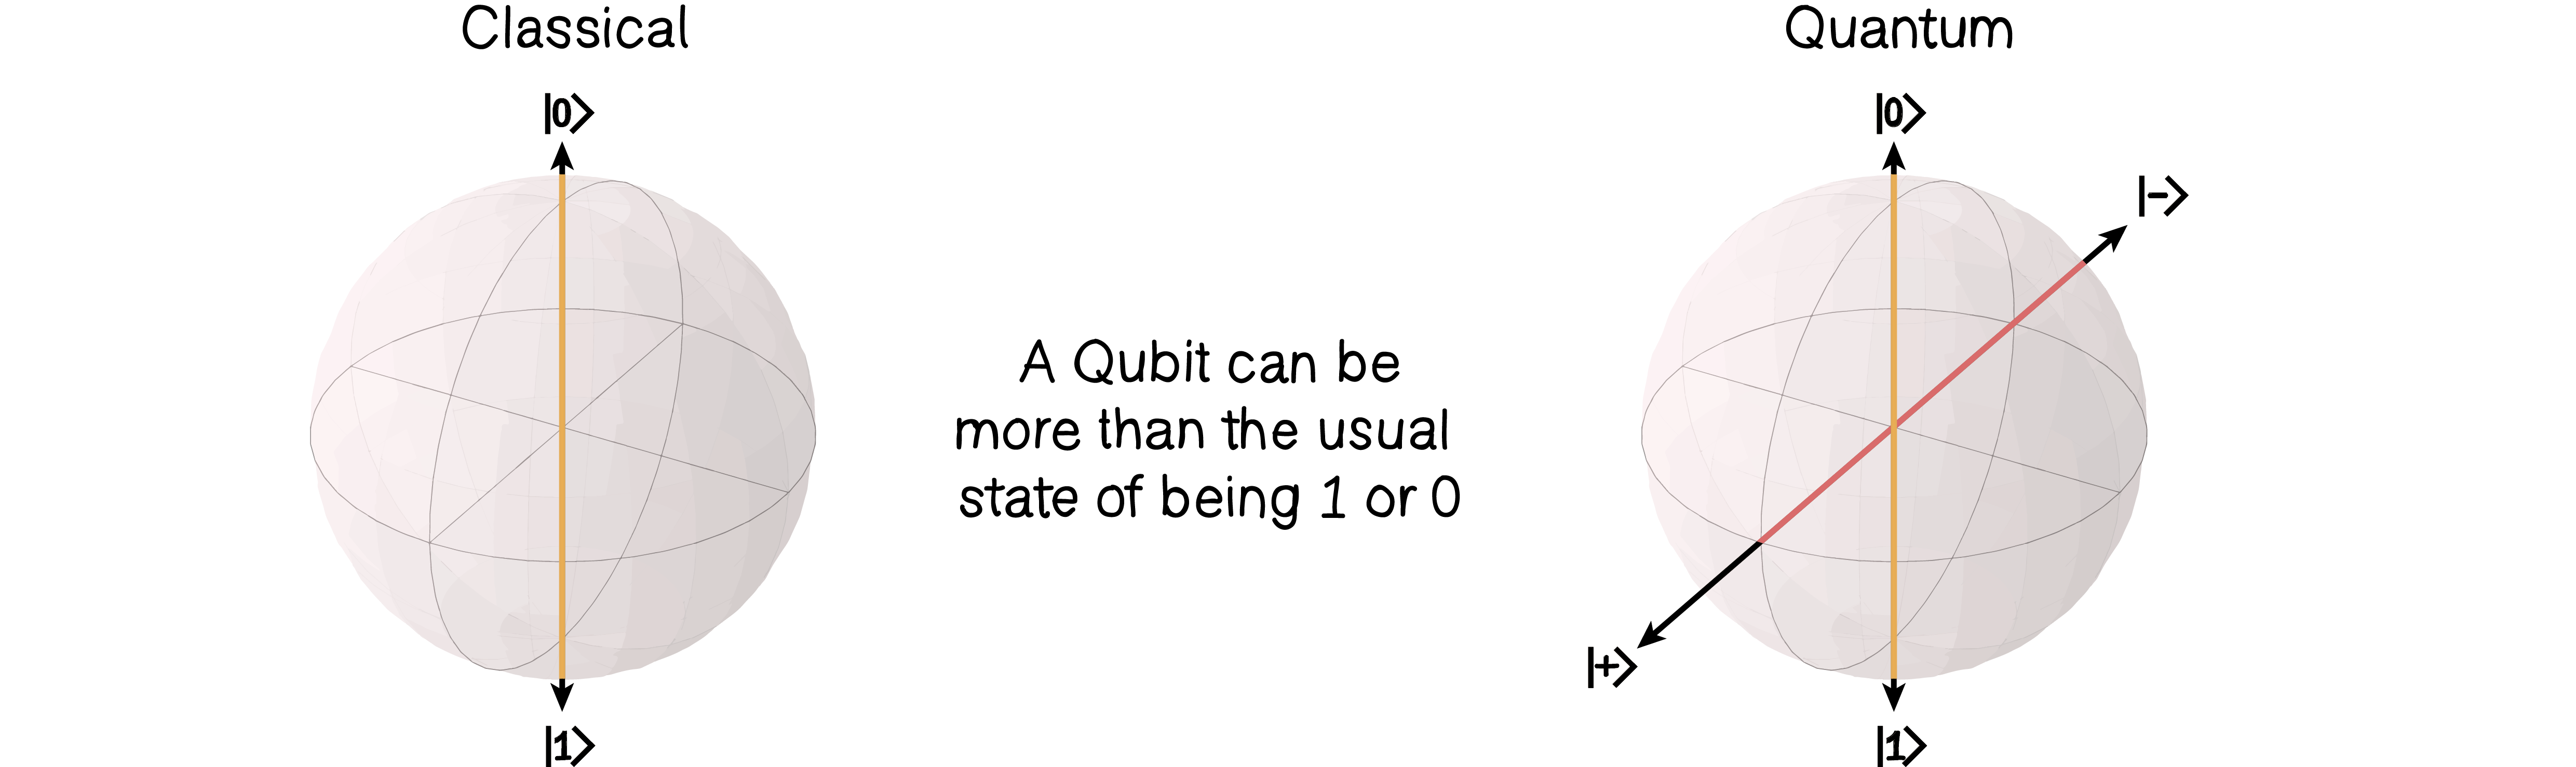

In [10]:
hide_this_cell

tooltiptext = "The button will disappear when pressed and consequently reveals the answer"
buttonDisappear5 = widgets.Button(description='Reveal the answer', tooltip=tooltiptext, disabled=False)
buttonShowBloch1 = widgets.Button(description='Superposition Bloch', disabled=False)
buttonShowGraph1 = widgets.Button(description='Superposition Graph', disabled=False)

def handleClickDisappear5(b):
    clear_output()
    display(Markdown('''**Answer: One single input!**
                        <div class="alert alert-block alert-warning">
                        <b>important info:</b> It is an undeniable fact that this outperforms a classical computer.<br>
                        We can achieve this by taking advantage of Superposition - With that, we can use more than the limitation of two states we know from classical computing, which, for the purpose of understanding it, has been super simplified in the picture below.<br>
                        <b>We will learn how to do this and how it works later in this tutorial.</b>                        
                        </div>'''))
    display(buttonShowBloch1)
    
def handleShowBloch1(b):
    clear_output()
    display(Markdown('''**Answer: One single input!**
                        <div class="alert alert-block alert-warning">
                        <b>important info:</b> It is an undeniable fact that this outperforms a classical computer.<br>
                        We can achieve this by taking advantage of Superposition - With that, we can use more than the limitation of two states we know from classical computing, which, for the purpose of understanding it, has been super simplified in the picture below.<br>
                        <b>We will learn how to do this and how it works later in this tutorial.</b>                        
                        </div>'''))
    display(buttonShowGraph1)
    display(Image(filename = "../images/deutsch/StateBloch.png"))


def handleShowGraph1(b):
    clear_output()
    display(Markdown('''**Answer: One single input!**
                        <div class="alert alert-block alert-warning">
                        <b>important info:</b> It is an undeniable fact that this outperforms a classical computer.<br>
                        We can achieve this by taking advantage of Superposition - With that, we can use more than the limitation of two states we know from classical computing, which, for the purpose of understanding it, has been super simplified in the picture below.<br>
                        <b>We will learn how to do this and how it works later in this tutorial.</b>                        
                        </div>'''))
    display(buttonShowBloch1)
    display(Image(filename = "../images/deutsch/StateGraph.png"))
    

buttonDisappear5.on_click(handleClickDisappear5)
buttonShowBloch1.on_click(handleShowBloch1)
buttonShowGraph1.on_click(handleShowGraph1)

display(buttonDisappear5)

---
## 1.4. The Black Box in a Quantum Context

As we learned from the _important note_ in first question; Quantum Computers only use reversible operations which inevitably poses as a problem, hence two of the four operations are not reversible. Therefore, we have to re-write the black box in a reversible way - which is actually a common practice in Quantum Computation.<br>
<br>
By adding an additional Qubit to the circuit of our black box, we can meet the rule regarding reversible operations and this is how:<br>
1. _Input$_{1}$_ is assumed to be initiallized as 0 for this example<br>
2. _Input$_{2}$_ is the Qubit we send our own chosen value through and to which the operation from the black box is applied <br>
3. _Input$_{1}$_ will then have its value erased and overwritten with the result from _Input$_{2}$_<br>
4. _output$_{1}$_ will therefore be the result of the operation used on _Input$_{2}$_<br>
5. _output$_{2}$_ will remain unchanged as the value we initially chose to send through<br>

The Black Box will in this case be illustrated like this:

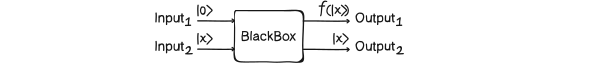

In [11]:
hide_this_cell
SVG(filename='../images/deutsch/QuantumBlackbox2.svg')

When we move further down to the questions below, the Quantum Gates we have to use to achieve the previously mentioned four operations, will be illustrated on a Quantum Circuit Diagram like this:

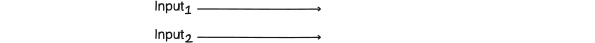

In [12]:
hide_this_cell
SVG(filename='../images/deutsch/CircuitDiagram0.svg')

### Quantum operations
<strong style="color: orange;">Question 6: Constant-0</strong> If we want to make a **Constant-0** operation and thereby consistently get the **value 0** by measuring _output$_{1}$_, which Quantum Gates do you think should be added to the Quantum Circuit Diagram and on which of the two Quantum Wires?

**Answer:** We do not add any Quantum Gates to the Quantum Circuit Diagram as we want the output to be a constant-0. <br>
                     We simply leave it as it is since the _Input$_{1}$_ is directly transferred to the _output$_{1}$_ regardless of what value we send into the Black Box at _Input$_{2}$_

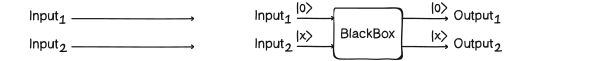

In [13]:
hide_this_cell

tooltiptext = "The button will disappear when pressed and consequently reveals the answer"
buttonDisappear61 = widgets.Button(description='Reveal a hint', tooltip=tooltiptext, disabled=False)
buttonDisappear62 = widgets.Button(description='Reveal the answer', tooltip=tooltiptext, disabled=False)

def handleClickDisappear61(b):
    clear_output()
    display(Markdown('**Hint:** - Remember that _Input$_{1}$_ is directly connected to _Output$_{1}$_'))
    display(buttonDisappear62)
    
def handleClickDisappear62(b):
    clear_output()
    display(Markdown('''**Answer:** We do not add any Quantum Gates to the Quantum Circuit Diagram as we want the output to be a constant-0. <br>
                     We simply leave it as it is since the _Input$_{1}$_ is directly transferred to the _output$_{1}$_ regardless of what value we send into the Black Box at _Input$_{2}$_'''))
    display(SVG(filename='../images/deutsch/CircuitDiagram3.svg'))
    
buttonDisappear61.on_click(handleClickDisappear61)
buttonDisappear62.on_click(handleClickDisappear62)

display(buttonDisappear61)

<strong style="color: orange;">Question 7: Constant-1</strong> If we want to make a **Constant-1** operation and thereby consistently get the **value 1** by measuring _output$_{1}$_, which Quantum Gates do you think should be added to the Quantum Circuit Diagram and on which of the two Quantum Wires?

**Answer:** By adding a Pauli-X gate, since _Input$_{1}$_ is directly connected to _output$_{1}$_, it will simply start as 0, then get Bit Flipped by the Pauli-X gate and end out as 1, regardless of what value we send into the Black Box at _Input$_{2}$_

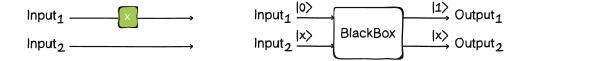

In [14]:
hide_this_cell

tooltiptext = "The button will disappear when pressed and consequently reveals the answer"
buttonDisappear71 = widgets.Button(description='Reveal a hint', tooltip=tooltiptext, disabled=False)
buttonDisappear72 = widgets.Button(description='Reveal the answer', tooltip=tooltiptext, disabled=False)

def handleClickDisappear71(b):
    clear_output()
    display(Markdown('**Hint:** - Remember that _Input$_{1}$_ is directly connected to _Output$_{1}$_'))
    display(buttonDisappear72)
    
def handleClickDisappear72(b):
    clear_output()
    display(Markdown('''**Answer:** By adding a Pauli-X gate, since _Input$_{1}$_ is directly connected to _output$_{1}$_, it will simply start as 0, then get Bit Flipped by the Pauli-X gate and end out as 1, regardless of what value we send into the Black Box at _Input$_{2}$_'''))
    display(SVG(filename='../images/deutsch/CircuitDiagram4.svg'))
    
buttonDisappear71.on_click(handleClickDisappear71)
buttonDisappear72.on_click(handleClickDisappear72)

display(buttonDisappear71)

<strong style="color: orange;">Question 8: Identity</strong> If we want to ensure that the output of the Black Box, _Output$_{1}$_, is the same value as we send into the black box, _Input$_{2}$_, which Quantum Gates do you think should be added to the Quantum Circuit Diagram and on which of the two Quantum Wires?

**Answer:** Add a CNOT gate with _Input$_{1}$_ as the Target Qubit and _Input$_{2}$_ as the Control Qubit<br>
                        If the Control Qubit, _Input$_{2}$_, is 0 - The Target Qubit will not be flipped and thereby remains 0<br>
                        If the Control Qubit, _Input$_{2}$_, is 1 - The Target Qubit will be flipped to 1.
                        

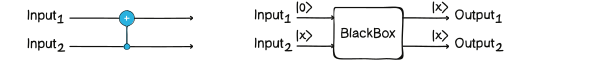

In [15]:
hide_this_cell

tooltiptext = "The button will disappear when pressed and consequently reveals the answer"
buttonDisappear81 = widgets.Button(description='Reveal a hint', tooltip=tooltiptext, disabled=False)
buttonDisappear82 = widgets.Button(description='Reveal the answer', tooltip=tooltiptext, disabled=False)

def handleClickDisappear81(b):
    clear_output()
    display(Markdown('''**Hint:** - If the value from _Input$_{2}$_ is 0, _Input$_{1}$_ should be equal to 0<br>
                        If the value from _Input$_{2}$_ is 1, _Input$_{1}$_ should be equal to 1'''))
    display(buttonDisappear82)
    
def handleClickDisappear82(b):
    clear_output()
    display(Markdown('''**Answer:** Add a CNOT gate with _Input$_{1}$_ as the Target Qubit and _Input$_{2}$_ as the Control Qubit<br>
                        If the Control Qubit, _Input$_{2}$_, is 0 - The Target Qubit will not be flipped and thereby remains 0<br>
                        If the Control Qubit, _Input$_{2}$_, is 1 - The Target Qubit will be flipped to 1.
                        '''))
    display(SVG(filename='../images/deutsch/CircuitDiagram1.svg'))

buttonDisappear81.on_click(handleClickDisappear81)
buttonDisappear82.on_click(handleClickDisappear82)

display(buttonDisappear81)

<strong style="color: orange;">Question 9: Negation</strong> This is the last operation, the opposite of the one above. If we want to make sure, that the output of the Black Box, _Output$_{1}$_, is the opposite value of the one we send into the black box _Input$_{2}$_, which Quantum Gates do you think should be added to the Quantum Circuit Diagram and on which of the two Quantum Wires?

**Answer:** Add a CNOT gate with _Input$_{1}$_ as the Target Qubit and _Input$_{2}$_ as the Control Qubit followed by a Pauli-X Gate.<br>
                        If the Control Qubit, _Input$_{2}$_, is 0 - The Target Qubit, _Input$_{1}$_, is not flipped and retains the value 0 but gets flipped by the X-gate to the opposite value.<br>
                        If the Control Qubit, _Input$_{2}$_, is 1 - The Target Qubit, _Input$_{1}$_, will be flipped to 1, but consequently gets flipped back to 0 by the X-gate.<br>
                        The _Output$_{1}$_ will therefore always be the opposite of the value, which we insert into the black box.
                        

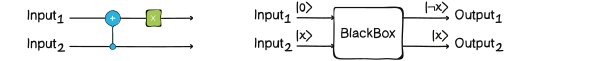

In [16]:
hide_this_cell

tooltiptext = "The button will disappear when pressed and consequently reveals the answer"
buttonDisappear91 = widgets.Button(description='Reveal a hint', tooltip=tooltiptext, disabled=False)
buttonDisappear92 = widgets.Button(description='Reveal the answer', tooltip=tooltiptext, disabled=False)

def handleClickDisappear91(b):
    clear_output()
    display(Markdown('''**Hint:** - If the value from _Input$_{2}$_ is 0, _Input$_{1}$_ should be equal to 0<br>
                        If the value from _Input$_{2}$_ is 1, _Input$_{1}$_ should be equal to 1'''))
    display(buttonDisappear92)
    
def handleClickDisappear92(b):
    clear_output()
    display(Markdown('''**Answer:** Add a CNOT gate with _Input$_{1}$_ as the Target Qubit and _Input$_{2}$_ as the Control Qubit followed by a Pauli-X Gate.<br>
                        If the Control Qubit, _Input$_{2}$_, is 0 - The Target Qubit, _Input$_{1}$_, is not flipped and retains the value 0 but gets flipped by the X-gate to the opposite value.<br>
                        If the Control Qubit, _Input$_{2}$_, is 1 - The Target Qubit, _Input$_{1}$_, will be flipped to 1, but consequently gets flipped back to 0 by the X-gate.<br>
                        The _Output$_{1}$_ will therefore always be the opposite of the value, which we insert into the black box.
                        '''))
    display(SVG(filename='../images/deutsch/CircuitDiagram2.svg'))

buttonDisappear91.on_click(handleClickDisappear91)
buttonDisappear92.on_click(handleClickDisappear92)

display(buttonDisappear91)

---
## 1.5. The Deutsch Oracle - Last section standing before coding!

The Quantum Circuit Diagram of the Deutsch Oracle is illustrated and shown below in all its glory.<br><br>
The Black Box seen on the Quantum Circuit Diagram is where we will insert our operations one by one.<br>
As we were told in section 3. we should be able to determine whether an operation is balanced or constant with merely a single input.<br><br>
Therefore:<br>
If the operation inside the black box is constant, the output of the Qubits should be in state after measurement <b>|</b>11<b>$>$</b>.<br>
If the operation inside the black box is balanced, the output of the Qubits should be in state after measurement <b>|</b>01<b>$>$</b>.

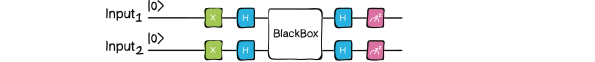

In [17]:
hide_this_cell
SVG(filename='../images/deutsch/DeutschAlgorithm0.svg')

---
$$◽️$$
$$◻️$$
$$⬜️$$
$$◻️$$
$$◽️$$


---
# 2. Coding time!
## ✅ 2.1 The Deutsch Oracle (This one is given to you)

Before we can use the Qiskit package, we have to load the library module it into the notebooks memory by using the import functions. Though, we do not have to import the libraries further down for the other exercises, as it stays in this notebooks memory once it they have been imported.


In [18]:
# The most essential libraries
import numpy as np
import qiskit

# Libraries used to visualize the result from our circuit
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram
from qiskit import BasicAer, QuantumRegister, ClassicalRegister, QuantumCircuit

### ✅ 2.1.1 Build the circuit

In [19]:
# Create a Quantum Register with 2 qubits.
qreg_1 = QuantumRegister(2)

# Create a Classical Register with 2 bits
creg_1 = ClassicalRegister(2)

# Create a Quantum Circuit acting on the quantum register
circuit_1 = QuantumCircuit(qreg_1, creg_1)

# Prepare the draw method, so we can visualize the circuit after the gates have been added.
circuit_1.draw();

### ✅ 2.1.2 Add the gates to the circuit accordingly to the image of The Deutsch Oracle 

In [20]:
# Before the black box Gates
circuit_1.x(qreg_1[0]);
circuit_1.x(qreg_1[1]);
circuit_1.h(qreg_1[0]);
circuit_1.h(qreg_1[1]);

# Black box Gates
circuit_1.barrier();


# After the black box Gates
circuit_1.barrier();
circuit_1.h(qreg_1[0]);
circuit_1.h(qreg_1[1]);

# Measure the Qubits
circuit_1.barrier()
circuit_1.measure(qreg_1[1], creg_1[1]);
circuit_1.measure(qreg_1[0], creg_1[0]);

### ✅ 2.1.3 Visualize the Quantum Circuit Diagram - Our Quantum Program

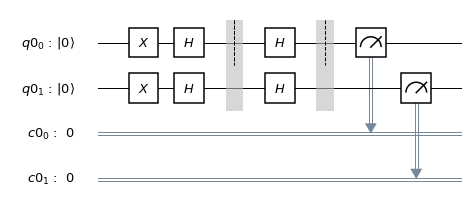

In [21]:
# Draw the Circuit
circuit_1.draw(output='mpl')

### ✅ 2.1.4 Test our Quantum Program on a Quantum Simulator

In [22]:
# Load the statevector backend to run our Quantum Program
backend = BasicAer.get_backend('statevector_simulator')

# Execute the Quantum Program
job_1 = qiskit.execute(circuit_1, backend)

# Get the results from the job
result_1 = job_1.result()

# Print the result
result_1.get_counts(circuit_1)

{'11': 1}

### ⚠️ 2.1.5 Visualizing the output for Quantum Program 2.1
For visualizing the result of the Quantum Program as we see above, {'11': 1}, you have to uncomment the method you wish to use below.

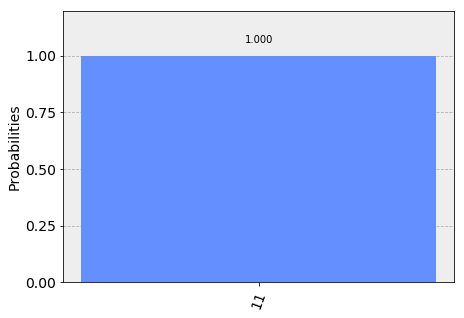

In [23]:
### Plot the result as a histogram
plot_histogram(result_1.get_counts(circuit_1))

### Plot the result as a bloch sphere - see the direction of the sphere 
#outputstate_1 = result_1.get_statevector(circuit_1)
#plot_bloch_multivector(outputstate_1)

---
$$◽️$$
$$◻️$$
$$⬜️$$
$$◻️$$
$$◽️$$

---
## ⚠️ 2.2 The Deutsch Oracle - Constant-0
As the operation inside this black box is constant, the output of the Qubits should be in state after measurement <b>|</b>11<b>$>$</b>.<br>

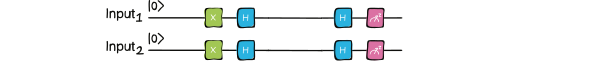

In [24]:
hide_this_cell
SVG(filename='../images/deutsch/DeutschAlgorithm3.svg')

### ⚠️ 2.2.1 Build the circuit 

In [25]:
# Create a Quantum Register with 2 qubits.
qreg_2 = QuantumRegister(2)

# Create a Classical Register with 2 bits
creg_2 = ClassicalRegister(2)

# Create a Quantum Circuit acting on the quantum register
circuit_2 = QuantumCircuit(qreg_2, creg_2)

# Prepare the draw method, so we can visualize the circuit after the gates have been added.
circuit_2.draw();

### ⚠️ 2.2.2 Add the gates to the Quantum Circuit accordingly to the constant-0 operation illustrated above

In [26]:
# Before the black box Gates
circuit_2.x(qreg_2[0]);
circuit_2.x(qreg_2[1]);

# Black box Gates
circuit_2.barrier();
circuit_2.h(qreg_2[0]);
circuit_2.h(qreg_2[1]);

# After the black box Gates
circuit_2.barrier();
circuit_2.h(qreg_2[0]);
circuit_2.h(qreg_2[1]);


# Measure the Qubits
circuit_2.barrier()
circuit_2.measure(qreg_2[1], creg_2[1]);
circuit_2.measure(qreg_2[0], creg_2[0]);

### ⚠️ 2.2.3 Visualize the Quantum Circuit Diagram - Our Quantum Program

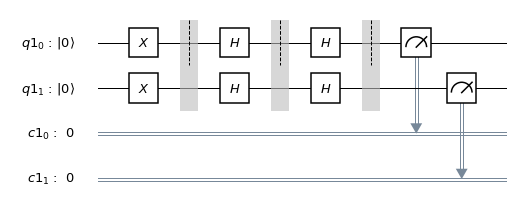

In [27]:
# Draw the Circuit
circuit_2.draw();
circuit_2.draw(output='mpl')

### ⚠️ 2.2.4 Test our Quantum Program on a Quantum Simulator

In [28]:
# Load the statevector backend to run our Quantum Program
backend = BasicAer.get_backend('statevector_simulator')

# Execute the Quantum Program
job_2 = qiskit.execute(circuit_2, backend)

# Get the results from the job
result_2 = job_2.result()

# Print the result
result_2.get_counts(circuit_2)

{'11': 1}

### ⚠️ 2.2.5 Visualizing the output for Quantum Program 2.2
For visualizing the result of the Quantum Program as we see above, {'11': 1}, you have to uncomment the method you wish to use below.

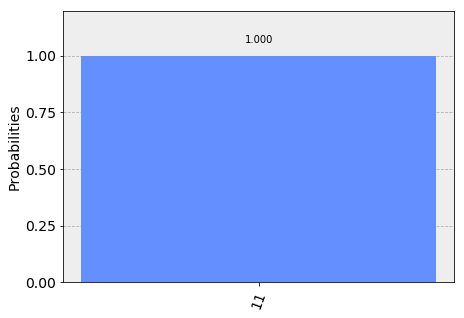

In [29]:
### Plot the result as a histogram
plot_histogram(result_2.get_counts(circuit_2))

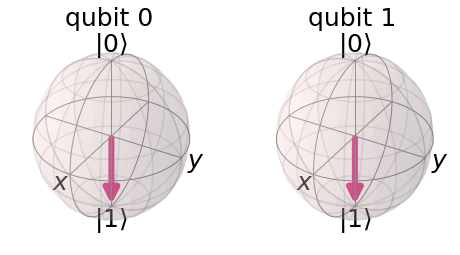

In [30]:
### Plot the result as a bloch sphere - see the direction of the sphere 
outputstate_2 = result_2.get_statevector(circuit_2)
plot_bloch_multivector(outputstate_2)

---
$$◽️$$
$$◻️$$
$$⬜️$$
$$◻️$$
$$◽️$$


---
## ⚠️ 2.3 The Deutsch Oracle - Constant-1
As the operation inside this black box is constant, the output of the Qubits should be in state after measurement <b>|</b>11<b>$>$</b>.<br>

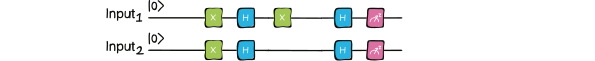

In [31]:
hide_this_cell
SVG(filename='../images/deutsch/DeutschAlgorithm4.svg')

### ✅ 2.3.1 Build the circuit

In [60]:
# Create a Quantum Register with 2 qubits.
qreg_3 = QuantumRegister(2)

# Create a Classical Register with 2 bits
creg_3 = ClassicalRegister(2)

# Create a Quantum Circuit acting on the quantum register
circuit_3 = QuantumCircuit(qreg_3, creg_3)

# Prepare the draw method, so we can visualize the circuit after the gates have been added.
circuit_3.draw();

### ⚠️ 2.3.2 Add the gates to the Quantum Circuit accordingly to the constant-1 operation illustrated above

In [33]:
# Before the black box Gates
circuit_3.x(qreg_3[0]);
circuit_3.x(qreg_3[1]);
circuit_3.h(qreg_3[0]);
circuit_3.h(qreg_3[1]);

# Black box Gates
circuit_3.barrier();
circuit_3.x(qreg_3[0]);

# After the black box Gates
circuit_3.barrier();
circuit_3.h(qreg_3[0]);
circuit_3.h(qreg_3[1]);

# Measure the Qubits
circuit_3.barrier();
circuit_3.measure(qreg_3[0],creg_3[0]);
circuit_3.measure(qreg_3[1],creg_3[1]);

### ⚠️ 2.3.3 Visualize the Quantum Circuit Diagram - Our Quantum Program

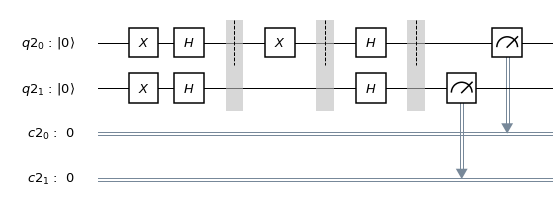

In [34]:
# Draw the Circuit
circuit_3.draw();
circuit_3.draw(output='mpl')

### ⚠️ 2.3.4 Test our Quantum Program on a Quantum Simulator

In [35]:
# Load the statevector backend to run our Quantum Program
backend = BasicAer.get_backend('statevector_simulator')

# Execute the Quantum Program
job_3 = qiskit.execute(circuit_3, backend)
# Get the results from the job
result_3 = job_3.result()

# Print the result
result_3.get_counts(circuit_3)

{'11': 1}

### ⚠️ 2.3.5 Visualizing the output for Quantum Program 2.3
For visualizing the result of the Quantum Program as we see above, {'11': 1}, you have to uncomment the method you wish to use below.

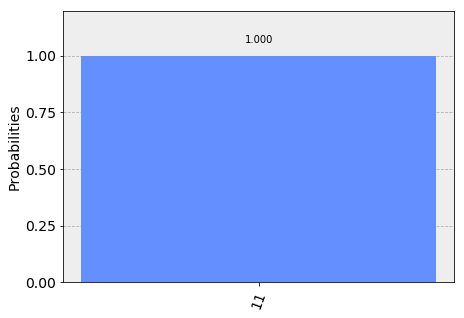

In [36]:
### Plot the result as a histogram
plot_histogram(result_3.get_counts(circuit_3))

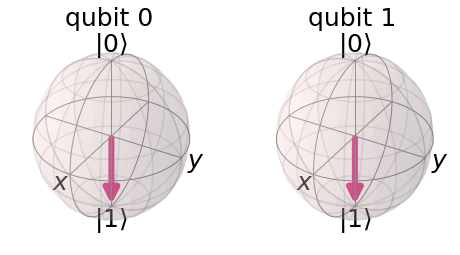

In [37]:
### Plot the result as a bloch sphere - see the direction of the sphere 
outputstate_3 = result_3.get_statevector(circuit_3)
plot_bloch_multivector(outputstate_3)

---
$$◽️$$
$$◻️$$
$$⬜️$$
$$◻️$$
$$◽️$$

---
## ⚠️ 2.4 The Deutsch Oracle - Identity

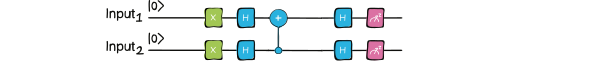

In [38]:
hide_this_cell
SVG(filename='../images/deutsch/DeutschAlgorithm1.svg')

### ✅ 2.4.1 Build the circuit

In [39]:
# Create a Quantum Register with 2 qubits.
qreg_4 = QuantumRegister(2)

# Create a Classical Register with 2 bits
creg_4 = ClassicalRegister(2)

# Create a Quantum Circuit acting on the quantum register
circuit_4 = QuantumCircuit(qreg_4, creg_4)

# Prepare the draw method, so we can visualize the circuit after the gates have been added.
circuit_4.draw();

### ⚠️ 2.4.2 Add the gates to the circuit accordingly to the image of The Deutsch Oracle 

In [40]:
# Before the black box Gates
circuit_4.x(qreg_4[0]);
circuit_4.x(qreg_4[1]);
circuit_4.h(qreg_4[0]);
circuit_4.h(qreg_4[1]);

# Black box Gates
circuit_4.barrier();
circuit_4.cx(qreg_4[1],qreg_4[0]);

# After the black box Gates
circuit_4.barrier();
circuit_4.h(qreg_4[0]);
circuit_4.h(qreg_4[1]);

# Measure the Qubits
circuit_4.barrier();
circuit_4.measure(qreg_4[0],creg_4[0]);
circuit_4.measure(qreg_4[1],creg_4[1]);

### ⚠️ 2.4.3 Visualize the Quantum Circuit Diagram - Our Quantum Program

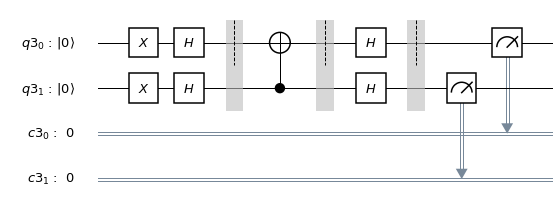

In [41]:
# Draw the Circuit
circuit_4.draw(output='mpl')

### ⚠️ 2.4.4 Test our Quantum Program on a Quantum Simulator

In [42]:
# Load the statevector backend to run our Quantum Program
backend = BasicAer.get_backend('statevector_simulator')

# Execute the Quantum Program
job_4 = qiskit.execute(circuit_4, backend)

# Get the results from the job
result_4 = job_4.result()

# Print the result
result_4.get_counts(circuit_4)

{'01': 1}

### ⚠️ 2.4.5 Visualizing the output for Quantum Program 2.4
For visualizing the result of the Quantum Program as we see above, {'01': 1}, you have to uncomment the method you wish to use below.

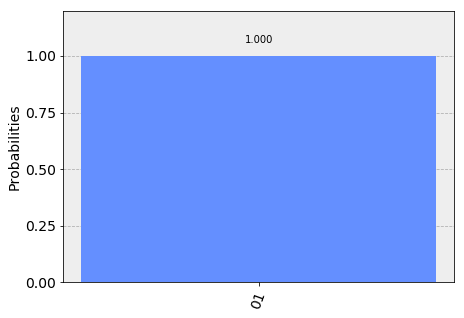

In [43]:
### Plot the result as a histogram
plot_histogram(result_4.get_counts(circuit_4))

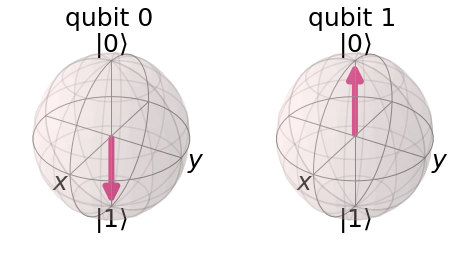

In [44]:
### Plot the result as a bloch sphere - see the direction of the sphere 
outputstate_4 = result_4.get_statevector(circuit_4)
plot_bloch_multivector(outputstate_4)

---
$$◽️$$
$$◻️$$
$$⬜️$$
$$◻️$$
$$◽️$$

---
## 2.5 The Deutsch Oracle - Negation

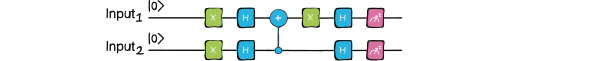

In [45]:
hide_this_cell
SVG(filename='../images/deutsch/DeutschAlgorithm2.svg')

### ✅ 2.5.1 Build the circuit

In [46]:
# Create a Quantum Register with 2 qubits.
qreg_5 = QuantumRegister(2)

# Create a Classical Register with 2 bits
creg_5 = ClassicalRegister(2)

# Create a Quantum Circuit acting on the quantum register
circuit_5 = QuantumCircuit(qreg_5, creg_5)

# Prepare the draw method, so we can visualize the circuit after the gates have been added.
circuit_5.draw();

### ⚠️ 2.5.2 Add the gates to the circuit accordingly to the image of The Deutsch Oracle 

In [47]:
# Before the black box Gates
circuit_5.x(qreg_5[0]);
circuit_5.x(qreg_5[1]);
circuit_5.h(qreg_5[0]);
circuit_5.h(qreg_5[1]);

# Black box Gates
circuit_5.barrier();
circuit_5.cx(qreg_5[1],qreg_5[0]);
circuit_5.x(qreg_5[0]);

# After the black box Gates
circuit_5.barrier();
circuit_5.h(qreg_5[0]);
circuit_5.h(qreg_5[1]);

# Measure the Qubits
circuit_5.barrier();
circuit_5.measure(qreg_5[1], creg_5[1]);
circuit_5.measure(qreg_5[0], creg_5[0]);

### ⚠️ 2.5.3 Visualize the Quantum Circuit Diagram - Our Quantum Program

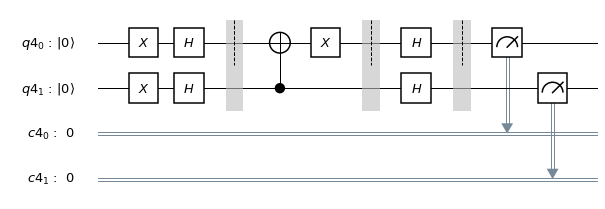

In [48]:
# Draw the Circuit
circuit_5.draw(output='mpl')

### ⚠️ 2.5.4 Test our Quantum Program on a Quantum Simulator

In [49]:
# Load the statevector backend to run our Quantum Program
backend = BasicAer.get_backend('statevector_simulator')

# Execute the Quantum Program
job_5 = qiskit.execute(circuit_5, backend)

# Get the results from the job
result_5 = job_5.result()

# Print the result
result_5.get_counts(circuit_5)

{'01': 1}

### ⚠️ 2.5.5 Visualizing the output for Quantum Program 2.5
For visualizing the result of the Quantum Program as we see above, {'01': 1}, you have to uncomment the method you wish to use below.

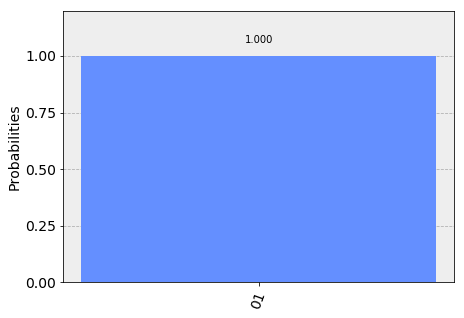

In [50]:
### Plot the result as a histogram
plot_histogram(result_5.get_counts(circuit_5))

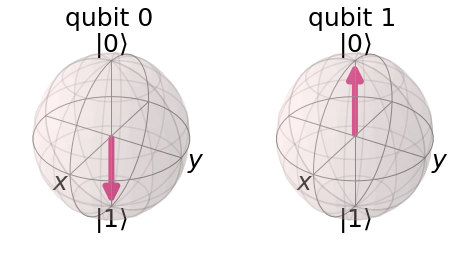

In [51]:
### Plot the result as a bloch sphere - see the direction of the sphere 
outputstate_5 = result_5.get_statevector(circuit_5)
plot_bloch_multivector(outputstate_5)

---
# 3. Sending the code to our real Quantum Computer
---
$$◽️$$
$$◻️$$
$$⬜️$$
$$◻️$$
$$◽️$$

---
## 3.1 Any of the abovementioned operations on the real Quantum Computer

In [52]:
from qiskit import IBMQ, execute

# Setting up your own IBM-Q account

To run the algorithm that you have just created on a real quantum computer, you need to setup your API-key that you get from the quantum experience website.
https://quantumexperience.ng.bluemix.net/qx/account/advanced

In [53]:
API_Token = "d608936af907ae7db922ef96c8ab55c701e44677f104d5b30762c4819e6b7f99e30052889ec4a043c360f4b976d0b18248a96b89d7cca713b910fc5b6211e9ae"

In [54]:
# We now save the account so we can use it with IBMQ
#IBMQ.save_account(API_Token);
# And now we register which account we are using.
IBMQ.load_accounts();

Now we setup our backend like before, but this time we are going to use the least_busy method from IBMQ. This method looks at all of the available quantum computers and chooses the one which is able to finish the job the fastest.

In [55]:
from qiskit.providers.ibmq import least_busy
device = least_busy(IBMQ.backends(simulator=False))

<div class="alert alert-block alert-warning">
    <b>Note:</b> It is also possible to choose your own backend by writing IBMQ.backends() and choosing the one that you want to place inside the IBMQ.get_backends() function.
</div>

Now we want to execute the job on our quantum computer, as well as monitor when the job will be done.

In [56]:
from qiskit.tools.monitor import job_monitor

# We excecute the job on the choosen backend
job_sim = execute(circuit_5, device)

job_monitor(job_sim, monitor_async=True)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

<div class="alert alert-block alert-warning">
    <b>Note:</b> When the line above says "Job Status: job has successfully run", you can proceed onwards to the code below.
</div>

In [57]:
# When the job is done, the results can be showed below.
sim_result = job_sim.result()
counts = sim_result.get_counts(circuit_5)

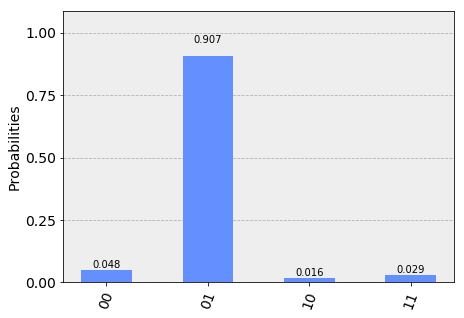

In [58]:
plot_histogram(counts)

In [59]:
# This is the same cell as seen at the beginning to hide code snippets from displaying
# This must be the last cell in the jupyter notebook!

hide_this_cell = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_this_cell') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
</script>''');

If you had patience to run the algorithm, you should see that the output shows almost the same result as the tests we did above. The difference is that the certainty of the result is a bit lower than before.